# IMPORTS

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

# DIFFERENTIAL EQUATION

$$\frac{dN}{dt}=-\frac{N}{\tau}$$

In [ ]:
def f(y, x, tau = 1):
    return - y / tau

## Numerical Methods
Denoting:
$$\Delta x = x_{i+1}-x_i$$

### Euler Method
$$y_{i+1} = y_i + f\left(y_i, x_i\right)\Delta x$$

In [ ]:
def euler(f, y0, x, *args):
    y = y0 * np.ones_like(x)

    for i in range(len(x) - 1):
        dx = x[i + 1] - x[i]
        k1 = f(y[i], x[i], *args) * dx
        y[i + 1] = y[i] + k1
    return y

### RK2 Method
$$
\begin{align}k_1 &= f\left(y_i, x_i\right)\Delta x\\
             k_2 &= f\left(y_i + k_1, x_i + \delta x\right)\Delta x\\
\end{align}
$$
$$y_{i+1} = y_i + \frac{1}{2}\left(k_1 + k_2\right)$$

In [ ]:
def rk2(f, y0, x, *args):
    y = y0 * np.ones_like(x)

    for i in range(len(x) - 1):
        dx = x[i + 1] - x[i]
        k1 = f(y[i], x[i], *args) * dx
        k2 = f(y[i] + k1, x[i] + dx, *args) * dx
        y[i + 1] = y[i] + 0.5 * (k1 + k2)
    return y

### RK4 Method
$$
\begin{align}k_1 &= \Delta x f\left(y_i, x_i\right)\\
             k_2 &= \Delta x f\left(y_i + \frac{k_1}{2}, x_i + \frac{\Delta x}{2}\right)\\
             k_3 &= \Delta x f\left(y_i + \frac{k_2}{2}, x_i + \frac{\Delta x}{2}\right)\\
             k_4 &= \Delta x f\left(y_i + k_3, x_i + \Delta x\right)\\
\end{align}
$$
$$y_{i + 1} = y_i + \frac{1}{6}\left(k_1 + 2\left(k_2 + k_3\right) + k_4\right)$$

In [ ]:
def rk4(f, y0, x, *args):
    y = y0 * np.ones_like(x)

    for i in range(len(x) - 1):
        dx = x[i + 1] - x[i]
        k1 = f(y[i], x[i], *args) * dx
        k2 = f(y[i] + 0.5 * k1, x[i] + 0.5 * dx, *args) * dx
        k3 = f(y[i] + 0.5 * k2, x[i] + 0.5 * dx, *args) * dx
        k4 = f(y[i] + k3, x[i] + dx, *args) * dx
        y[i + 1] = y[i] + (k1 + 2 * (k2 + k3) + k4) / 6
    return y

## Analytical Solution

$$N\left(t\right)=N_0e^{\frac{-x}{\tau}}$$


In [ ]:
def nexact(x, tau = 1, N0 = 1000):
    return N0 * np.exp(-x / tau)

## Error
### Global

In [ ]:
def error_global(calculated, exact):
    return np.cumsum(calculated - exact)

# CODING & PLOTTING

In [ ]:
# parameters
N0  = 1000   # initial number of atoms
tau = 1     # mean lifetime - set to 1, i.e., measure time in units of tau
t_i = 0
t_f =5 * tau

nsteps = 100 # number of time steps to take

dt = np.array([0.05, 0.2, 0.8, 1.0, 1.5])
ratios = 1.0*dt
labels = [rf'$\Delta t/\tau = {ratio:0.4f}$' for ratio in ratios]

In [ ]:
print(labels)

['$\\Delta t/\\tau = 0.0500$', '$\\Delta t/\\tau = 0.2000$', '$\\Delta t/\\tau = 0.8000$', '$\\Delta t/\\tau = 1.0000$', '$\\Delta t/\\tau = 1.5000$']


In [ ]:
t = [np.arange(t_i, t_f, ratio * tau) for ratio in ratios]

N_euler = [euler(f, N0, t_, tau) for t_ in t]
N_rk2 = [rk2(f, N0, t_, tau) for t_ in t]
N_rk4 = [rk4(f, N0, t_, tau) for t_ in t]

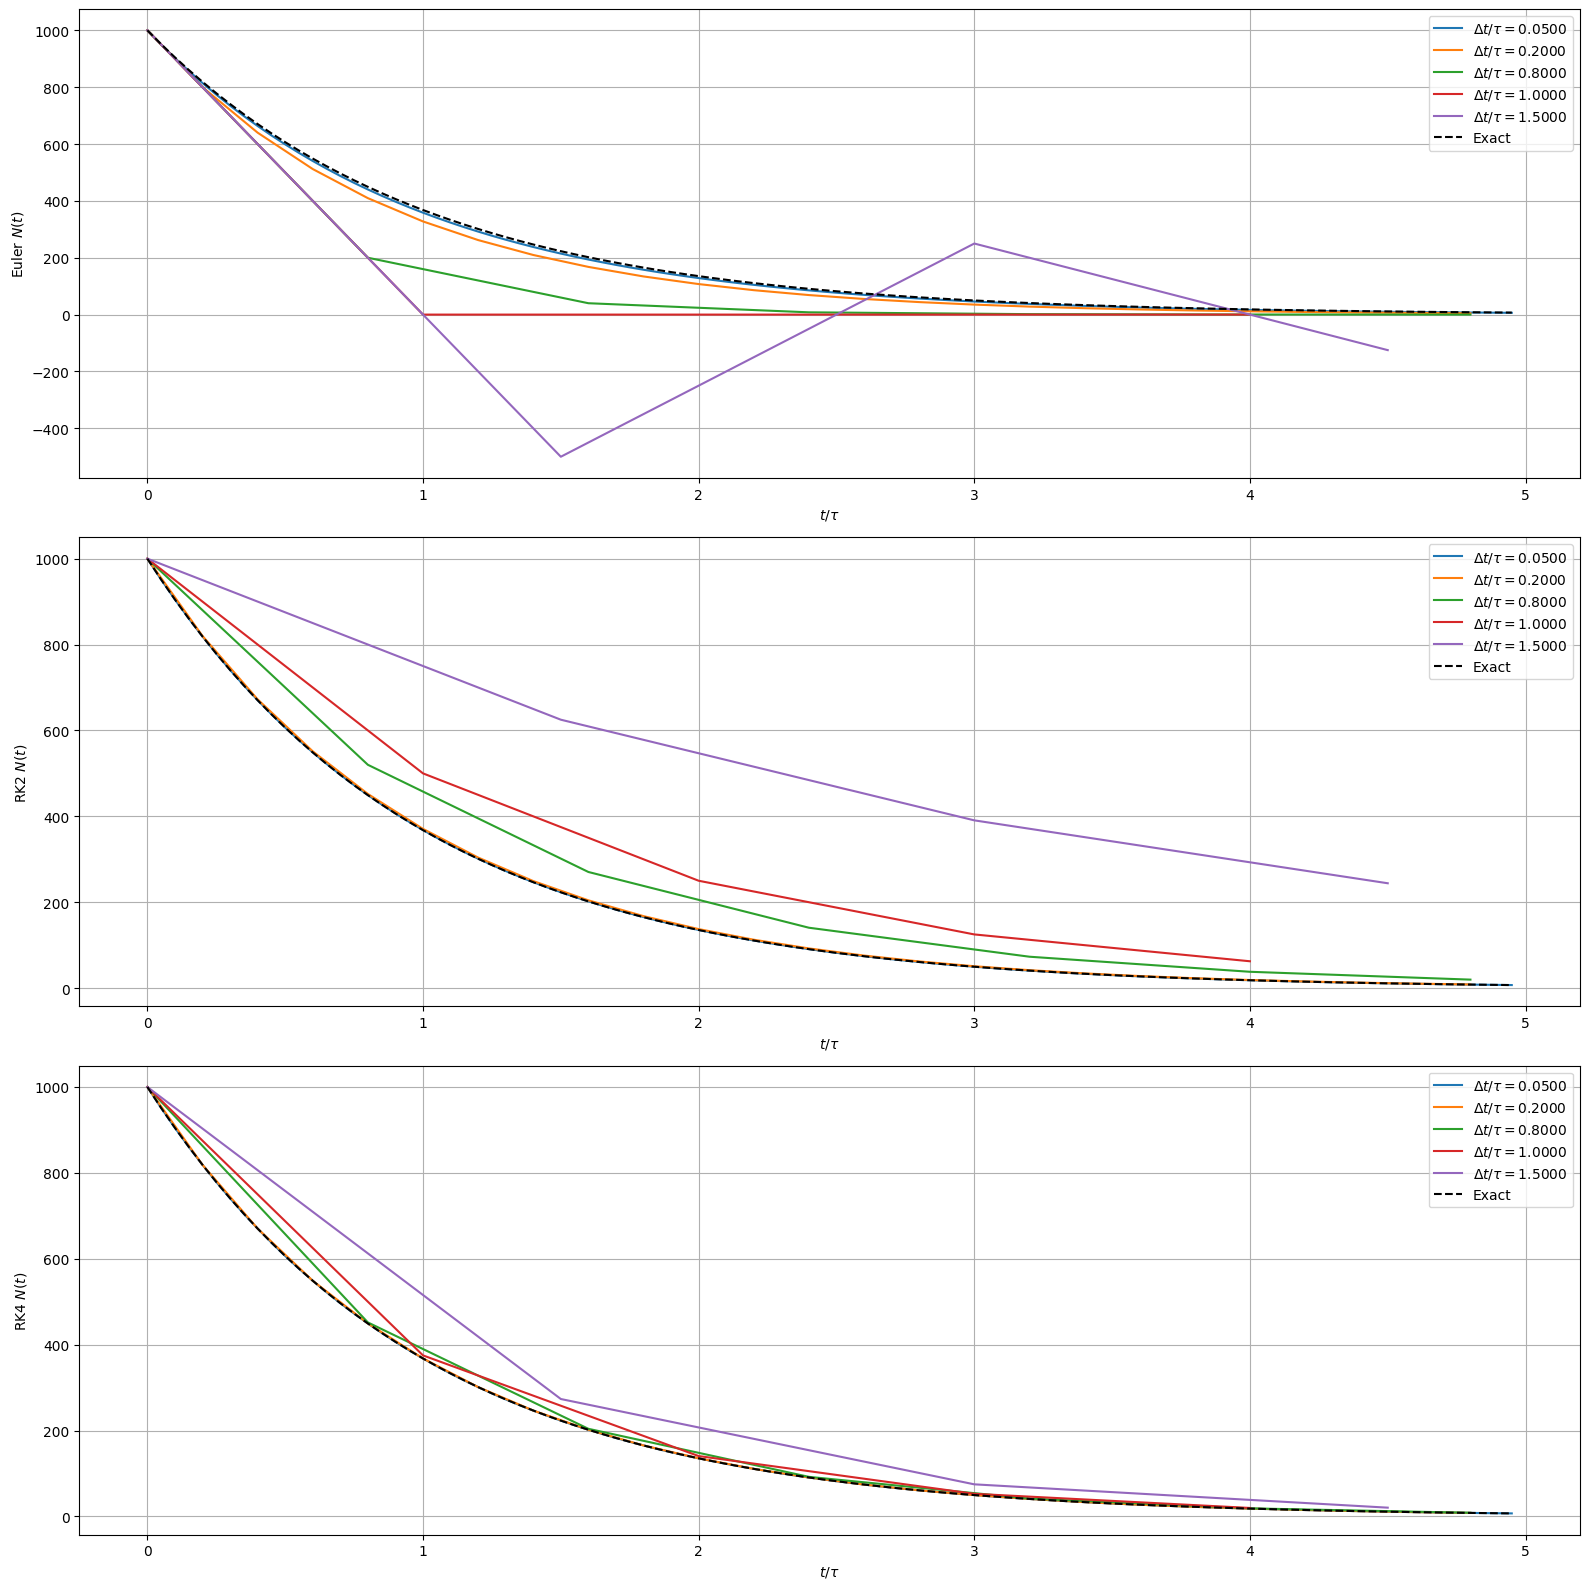

In [ ]:
fig1, (axis1, axis2, axis3) = plt.subplots(3, 1, figsize=(16,16))

for i, label in enumerate(labels):
    axis1.plot(t[i] / tau, N_euler[i], label=label)
    axis2.plot(t[i] / tau, N_rk2[i], label=label)
    axis3.plot(t[i] / tau, N_rk4[i], label=label)

for axis in (axis1, axis2, axis3):
    axis.plot(t[0] / tau, nexact(t[0], tau, N0), c='k',ls='--', label="Exact")
    axis.set_xlabel(r'$t/\tau$')
    axis.legend()
    axis.grid()

axis1.set_ylabel(r'Euler $N(t)$')
axis2.set_ylabel(r'RK2 $N(t)$')
axis3.set_ylabel(r'RK4 $N(t)$')

plt.tight_layout()
plt.savefig("Lab1_results.png")

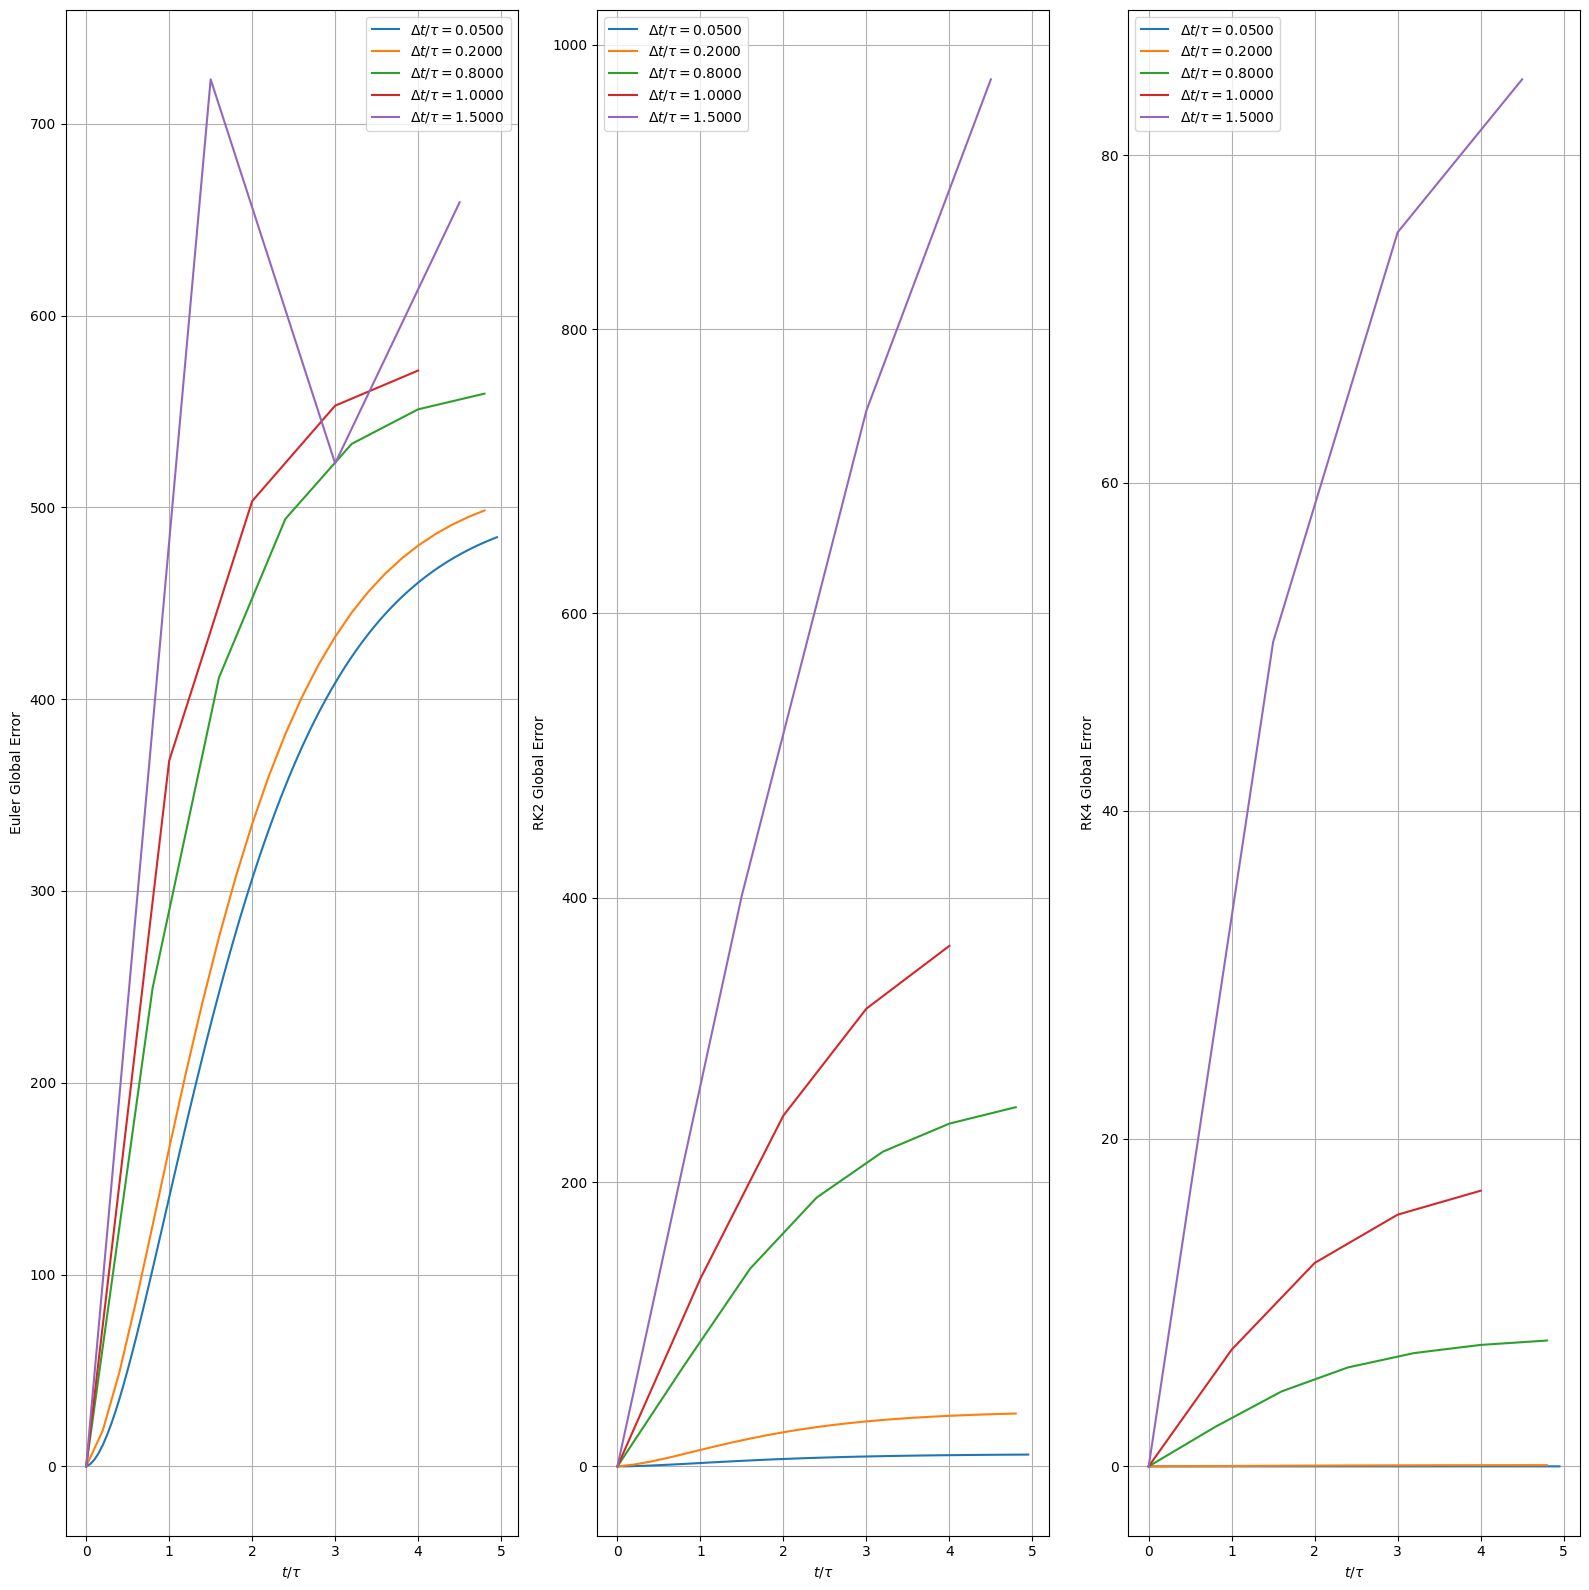

In [ ]:
fig2, (axis1, axis2, axis3) = plt.subplots(1, 3, figsize=(16,16))

for i, label in enumerate(labels):
    axis1.plot(t[i] / tau, np.absolute(error_global(N_euler[i], nexact(t[i], tau, N0))), label=label)
    axis2.plot(t[i] / tau, np.absolute(error_global(N_rk2[i], nexact(t[i], tau, N0))), label=label)
    axis3.plot(t[i] / tau, np.absolute(error_global(N_rk4[i], nexact(t[i], tau, N0))), label=label)

for axis in (axis1, axis2, axis3):
    axis.set_xlabel(r'$t/\tau$')
    axis.legend()
    axis.grid()

axis1.set_ylabel("Euler Global Error")
axis2.set_ylabel("RK2 Global Error")
axis3.set_ylabel("RK4 Global Error")

plt.tight_layout()
plt.savefig("Lab1_global_error.png")